**<h3>INTRODUCTION</h3>**
* In this kernel, I will compare using sklearn classification algorithms.
* The data set I use contains information about bank customers.

Content:
* [Summarize the Dataset](#1)
* [Train Test separating the Dataset](#2)
* [Logistic Regression Classification](#3)
* [K-Nearest Neighbour (KNN) Classification](#4)
* [Support Vector Machine (SVM) Classification](#5)
* [Naive Bayes Classification](#6)
* [Decision Tree Classification](#7)
* [Random Forest Classification](#8)
* [Comparison of Algorithms](#8)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import numpy as np

import warnings            
warnings.filterwarnings("ignore") 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['churn-modelling']


<a id=1></a>
**<h3>Summarize the Dataset</h3>**
* Now it is time to take a look at the data.

In [2]:
#Load dataset
data=pd.read_csv('../input/churn-modelling/Churn_Modelling.csv')
#data includes how many rows and columns
data.shape
print("Our data has {} rows and {} columns".format(data.shape[0],data.shape[1]))
#Features name in data
data.columns

Our data has 10000 rows and 14 columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [3]:
#diplay first 5 rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


now let's delete the features i think i don't need

In [4]:
data.drop(['RowNumber', 'CustomerId', 'Surname','Geography'], axis=1, inplace=True)

#I replaced Gender feature from Male/Female to 1/0.
data.Gender = [1 if each == 'Male' else 0 for each in data.Gender] 

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [6]:
#checking for missing values
print('Are there missing values? {}'.format(data.isnull().any().any()))
#missing value control in features
data.isnull().sum()

Are there missing values? False


CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Let's check the target variable now

0    7963
1    2037
Name: Exited, dtype: int64

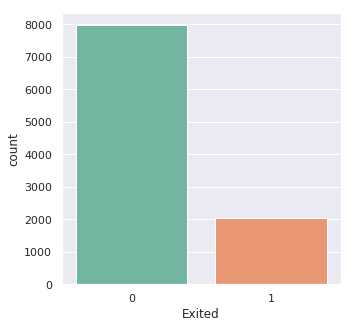

In [7]:
plt.figure(figsize=[5,5])
sns.set(style='darkgrid')
ax = sns.countplot(x='Exited', data=data, palette='Set2')
data.loc[:,'Exited'].value_counts()

dataset seemed to me unbalanced. Unbalanced data can mislead us in the learning process.

<a id=2></a>
**<h3>Train Test separating the Dataset</h3>**
* Now separete target feature (y) from other features (x_data).

In [8]:
y = data.Exited.values
x_data = data.drop(['Exited'], axis=1)

In [9]:
#we should normalize our features, features should dominate each other.
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data))
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (9000, 9)
y_train shape:  (9000,)
x_test shape:  (1000, 9)
y_test shape:  (1000,)


<a id=3></a>
**<h3>Logistic Regression Classification</h3>**

In [11]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix
lr_cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",lr_cm)

print('test accuracy: {}'.format(lr.score(x_test,y_test)))
print('Classification report: \n',classification_report(y_test,y_pred))

confusion matrix:
 [[788  21]
 [159  32]]
test accuracy: 0.82
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       809
           1       0.60      0.17      0.26       191

    accuracy                           0.82      1000
   macro avg       0.72      0.57      0.58      1000
weighted avg       0.79      0.82      0.78      1000



<a id=4></a>
**<h3>K-Nearest Neighbour (KNN) Classification</h3>**

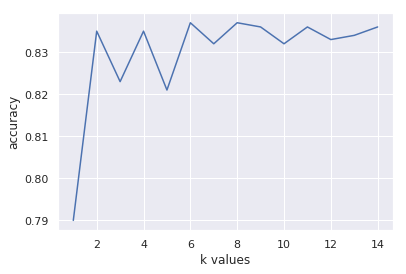

In [12]:
#find k value
from sklearn.neighbors import KNeighborsClassifier

score_list=[]
for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [13]:
#knn algorithm

knn=KNeighborsClassifier(n_neighbors=13) #n_neighbors=k
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, prediction)
print("confusion matrix:\n",knn_cm)

print('test accuracy: {}'.format(knn.score(x_test,y_test)))
print('Classification report: \n',classification_report(y_test,y_pred))

confusion matrix:
 [[785  24]
 [142  49]]
test accuracy: 0.834
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       809
           1       0.60      0.17      0.26       191

    accuracy                           0.82      1000
   macro avg       0.72      0.57      0.58      1000
weighted avg       0.79      0.82      0.78      1000



<a id=5></a>
**<h3>Support Vector Machine (SVM) Classification</h3>**

In [14]:
#svm algorithm
from sklearn.svm import SVC
svm = SVC(random_state=0)
svm.fit(x_train,y_train)
prediction=svm.predict(x_test)

from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test, prediction)
print("confusion matrix:\n",svm_cm)

print('test accuracy: {}'.format(svm.score(x_test,y_test)))
print('Classification report: \n',classification_report(y_test,y_pred))

confusion matrix:
 [[795  14]
 [128  63]]
test accuracy: 0.858
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       809
           1       0.60      0.17      0.26       191

    accuracy                           0.82      1000
   macro avg       0.72      0.57      0.58      1000
weighted avg       0.79      0.82      0.78      1000



<a id=6></a>
**<h3>Naive Bayes Classification</h3>**

In [15]:
#naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
prediction=nb.predict(x_test)

from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, prediction)
print("confusion matrix:\n",nb_cm)

print('test accuracy: {}'.format(nb.score(x_test,y_test)))
print('Classification report: \n',classification_report(y_test,y_pred))

confusion matrix:
 [[791  18]
 [146  45]]
test accuracy: 0.836
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       809
           1       0.60      0.17      0.26       191

    accuracy                           0.82      1000
   macro avg       0.72      0.57      0.58      1000
weighted avg       0.79      0.82      0.78      1000



<a id=7></a>
**<h3>Decision Tree Classification</h3>**

In [16]:
#desicion tree algorithm
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
cart.fit(x_train,y_train)
prediction=cart.predict(x_test)

from sklearn.metrics import confusion_matrix
cart_cm = confusion_matrix(y_test, prediction)
print("confusion matrix:\n",cart_cm)

print('test accuracy: {}'.format(cart.score(x_test,y_test)))
print('Classification report: \n',classification_report(y_test,y_pred))

confusion matrix:
 [[692 117]
 [ 98  93]]
test accuracy: 0.785
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       809
           1       0.60      0.17      0.26       191

    accuracy                           0.82      1000
   macro avg       0.72      0.57      0.58      1000
weighted avg       0.79      0.82      0.78      1000



<a id=8></a>
**<h3>Random Forest Classification</h3>**

In [17]:
#desicion tree algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=3)
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

from sklearn.metrics import confusion_matrix
rf_cm = confusion_matrix(y_test, prediction)
print("confusion matrix:\n",rf_cm)

print('test accuracy: {}'.format(rf.score(x_test,y_test)))
print('Classification report: \n',classification_report(y_test,y_pred))

confusion matrix:
 [[777  32]
 [105  86]]
test accuracy: 0.863
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       809
           1       0.60      0.17      0.26       191

    accuracy                           0.82      1000
   macro avg       0.72      0.57      0.58      1000
weighted avg       0.79      0.82      0.78      1000



* we can make improvements in our model by playing with hypertuning parameters

<a id=9></a>
**<h3>Comparison of Algorithms</h3>**

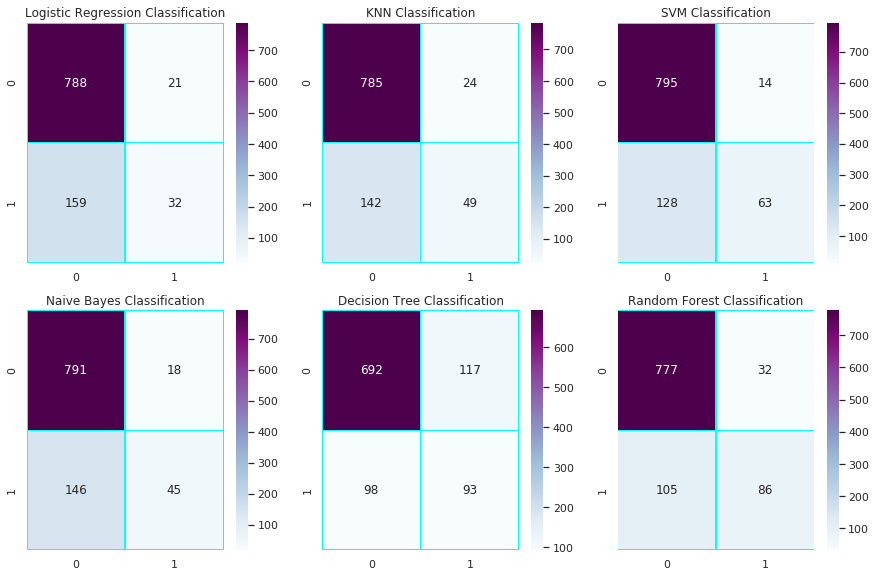

In [18]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('Logistic Regression Classification')

ax2 = fig.add_subplot(3, 3, 2) # row, column, position
ax2.set_title('KNN Classification')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('SVM Classification')

ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Naive Bayes Classification')

ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Decision Tree Classification')

ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Random Forest Classification')


sns.heatmap(data=lr_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax1, cmap='BuPu')
sns.heatmap(data=knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax2, cmap='BuPu')   
sns.heatmap(data=svm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax3, cmap='BuPu')
sns.heatmap(data=nb_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax4, cmap='BuPu')
sns.heatmap(data=cart_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax5, cmap='BuPu')
sns.heatmap(data=rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax6, cmap='BuPu')
plt.show()